# Probe analysis

In [1]:
!python -m pip install torch
!python -m pip install pandas
!python -m pip install tqdm
!python -m pip install torchaudio
!python -m pip install datasets
!python -m pip install numpy
!python -m pip install matplotlib
!python -m pip install seaborn
!python -m pip install pyannote.audio


  Using cached torch-2.2.0-cp38-cp38-manylinux1_x86_64.whl.metadata (25 kB)
  Using cached filelock-3.13.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
  Using cached fsspec-2024.2.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-1

In [3]:
!python -m pip install soundata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached flake8-7.0.0-py2.py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.1 MB/s eta 0:00:00 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
  Using cached mccabe-0.7.0-py2.py3-none-any.whl (7.3 kB)
  Using cached pycodestyle-2.11.1-py2.py3-none-any.whl.metadata (4.5 kB)
  Using cached pyflakes-3.2.0-py2.py3-none-any.whl.metadata (3.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached mypy_extensions-1.0.0-py3-none-any.whl (4.7 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 61.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 72.7 MB/s eta 0:00:000m eta 0:00:010:01:01
Using cached flake8-7.0.0-py2.py3-none-any.whl (57 kB)
   ━━━━━━━━━━

In [2]:
import torch
import torch.nn.functional as F
import pandas
import tqdm
import torchaudio
import torchaudio.transforms as T
import os
from datasets import load_dataset,Audio
from src.utils.datasets import CommonVoiceDataset,TimitDataset,UrbanSound8k,GTZAN
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
#from sklearn.model_selection import train_test_split
import seaborn as sn

/home/mlebourd/Documents/local_experiments/projets-martin/NMF/src/utils/datasets.py:12: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("soundfile")


# First Model

In [6]:
import yaml
from pyannote.audio import Model

w_nmf = torch.load("/lium/raid01_b/tmario/phD/JSALT2023/src/1.explainability/nmf/src/nmf/w_nmf_256_1024_nn_augment.pt")
with open("/lium/raid01_b/tmario/phD/JSALT2023/src/1.explainability/nmf/config_wavlm.yaml","rb") as fh:
    cfg = yaml.safe_load(fh)
model = Model.from_pretrained("/lium/raid01_b/tmario/phD/JSALT2023/src/1.explainability/nmf/3MASNMF/augment/X.Segmentation.Full_WP2-augment-10.0-1.0-0.1-augTrue/models/23_11_14.ckpt",
                              w_nmf=w_nmf,
                              wavlm_cfg=cfg["model"]["wavlm"],
                              spec_kw={"win_length":1024, "hop_length":320,"n_fft":1024})
model.freeze()

Type of NMF matrix: <class 'torch.Tensor'> torch.Size([513, 256])


Using cache found in /lium/home/mlebour/.cache/torch/hub/s3prl_s3prl_main


# Sparser Model

In [3]:
import yaml
from pyannote.audio import Model

w_nmf = torch.load("/lium/raid01_b/tmario/phD/JSALT2023/src/1.explainability/nmf/dict/W_win_1024_nfft_1024_256_beta_2_mu_1_AragonRadio_sp_200_mus_500_no_500_max_seg_4.pt")
with open("/lium/raid01_b/tmario/phD/JSALT2023/src/1.explainability/nmf/config_wavlm.yaml","rb") as fh:
    cfg = yaml.safe_load(fh)
model = Model.from_pretrained("/lium/raid01_b/tmario/phD/JSALT2023/src/1.explainability/nmf/3MASNMF/make_it_sparser_256/X.Segmentation.Full_WP2-make_it_sparser_256-10.0-5.0-0.1-augTrue/models/23_12_12.ckpt",
                              w_nmf=w_nmf,
                              wavlm_cfg=cfg["model"]["wavlm"],
                              spec_kw={"win_length":1024, "hop_length":320,"n_fft":1024})
model.freeze()

Type of NMF matrix: <class 'torch.Tensor'> torch.Size([513, 256])


Using cache found in /lium/home/mlebour/.cache/torch/hub/s3prl_s3prl_main


In [4]:
class LinProbe(torch.nn.Module):
    
    def __init__(self,input_size=256,output_size=10,agreg = "mean_std"):
        super().__init__()
        self.agreg = agreg
        weight = 1 if agreg in ["mean","std"] else 2
        
        self.probe = torch.nn.Sequential(torch.nn.Linear(weight*input_size,output_size))
    
    def forward(self,x):
        x_mean = None
        x_std = None
        if "mean" in self.agreg:
            x_mean = x.mean(dim=1)
        if "std" in self.agreg:
            x_std = x.std(dim=1)
        if x_mean is not None and x_std is not None:
            input_x = torch.cat([x_mean,x_std],dim=-1)
        elif x_mean is not None:
            input_x = x_mean
        elif x_std is not None:
            input_x = x_std
        
        y = self.probe(input_x)
        
        return y

In [4]:
class LinProbe(torch.nn.Module):
    
    def __init__(self,input_size=256,output_size=10):
        super().__init__()
        self.probe = torch.nn.Sequential(torch.nn.Linear(2*input_size,output_size))
    
    def forward(self,x):
        x_mean = x.mean(dim=1)
        x_std = x.std(dim=1)
        
        y = self.probe(torch.cat([x_mean,x_std],dim=-1))
        
        return y

In [ ]:
/lium/raid01_b/tmario/phD/JSALT2023/src/1.explainability/nmf/3MASNMF/make_it_sparser_256/

In [5]:
ckpt1 = torch.load("probes/sparse_noise_probe_256.pt")
ckpt2 = torch.load("probes/sparse_phone_probe_256_norepeat.pt")
ckpt3 = torch.load("probes/sparse_gender_probe256.pt")
#ckpt4 = torch.load("probes/music_style_lin_probe.pt")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
ckpt1 = torch.load("/lium/raid01_b/tmario/phD/JSALT2023/src/1.explainability/nmf/probes/noise_probe.pt")
ckpt2 = torch.load("/lium/raid01_b/tmario/phD/JSALT2023/src/1.explainability/nmf/probes/phone_probe.pt")
ckpt3 = torch.load("/lium/raid01_b/tmario/phD/JSALT2023/src/1.explainability/nmf/probes/gender_probe.pt")
ckpt4 = torch.load("/lium/raid01_b/tmario/phD/JSALT2023/src/1.explainability/nmf/probes/music_style_lin_probe.pt")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# classif_probe = LinProbe(input_size=256,output_size=10)
# classif_probe.load_state_dict(ckpt)
# classif_probe.to(device)
# model.to(device)

Text(0.5, 1.0, 'gender probe')

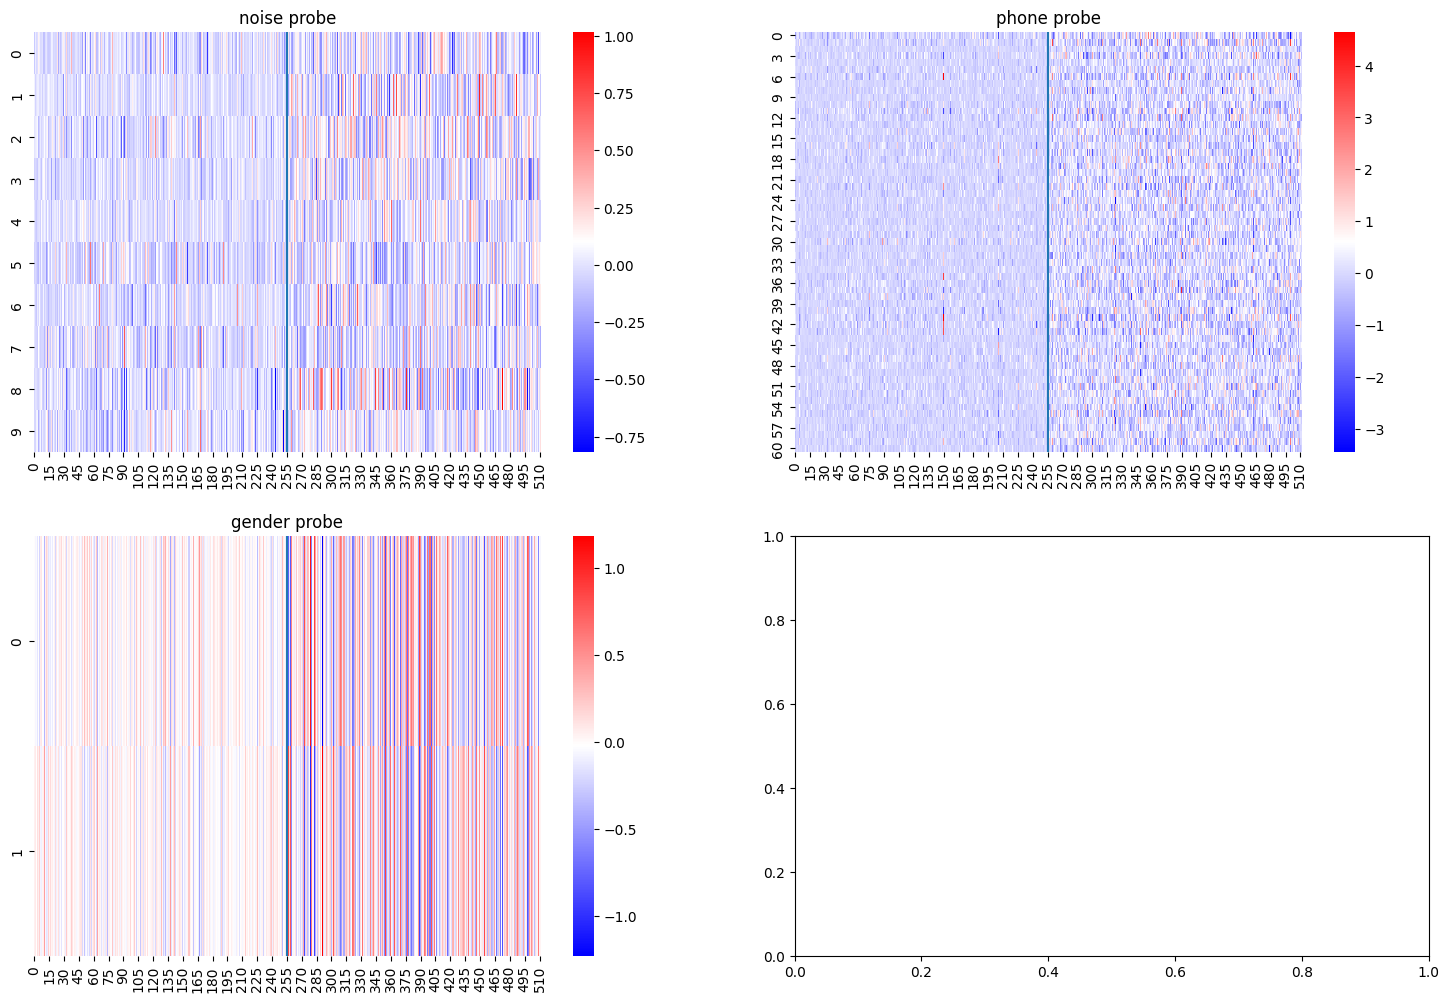

In [5]:

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(18,12))

sn.heatmap(ckpt1['probe.0.weight'].cpu(),cmap='bwr',ax=ax1)
ax1.axvline(256)
ax1.set_title('noise probe')

sn.heatmap(ckpt2['probe.0.weight'].cpu(),cmap='bwr',ax=ax2)
ax2.axvline(256)
ax2.set_title('phone probe')

sn.heatmap(ckpt3['probe.0.weight'].cpu(),cmap='bwr',ax=ax3)
ax3.axvline(256)
ax3.set_title('gender probe')

# sn.heatmap(ckpt4['probe.0.weight'].cpu(),cmap='bwr',ax=ax4)
# ax4.axvline(256)
# ax4.set_title('music gender probe')

In [ ]:
print("COSINE")
mat = np.zeros((4,4))
def l1(vect):
    return vect.abs().sum(dim=0)
def l2(vect):
    return vect.pow(2).sum(dim=0).sqrt()
for ii,(ckpti,labeli) in enumerate([(ckpt1,"noise_probe"),(ckpt2,"phone_probe"),(ckpt3,"gender_probe"),(ckpt4,"style_probe")]):
    for jj,(ckptj,labelj) in enumerate([(ckpt1,"noise_probe"),(ckpt2,"phone_probe"),(ckpt3,"gender_probe"),(ckpt4,"style_probe")]):
        composantes_i = l2(ckpti['probe.0.weight'].cpu())
        composantes_j = l2(ckptj['probe.0.weight'].cpu())
        mat[ii,jj] = F.cosine_similarity(composantes_i,composantes_j,dim=0)
        print(f"[{labeli} vs {labelj}] : {F.cosine_similarity(composantes_i,composantes_j,dim=0)}")
sn.heatmap(mat,annot=True,xticklabels=['noise_probe','phone_probe','gender_probe','style_probe'],yticklabels=['noise_probe','phone_probe','gender_probe','style_probe'])
plt.title("Cosine Similarity between layers")

In [ ]:
print("COSINE Index")
mat = np.zeros((4,4))
def l1(vect):
    return vect.abs().sum(dim=0)
def l2(vect):
    return vect.pow(2).sum(dim=0).sqrt()
for ii,(ckpti,labeli) in enumerate([(ckpt1,"noise_probe"),(ckpt2,"phone_probe"),(ckpt3,"gender_probe"),(ckpt4,"style_probe")]):
    for jj,(ckptj,labelj) in enumerate([(ckpt1,"noise_probe"),(ckpt2,"phone_probe"),(ckpt3,"gender_probe"),(ckpt4,"style_probe")]):
        composantes_i = torch.argsort(l2(ckpti['probe.0.weight'].cpu())).float()
        composantes_j = torch.argsort(l2(ckptj['probe.0.weight'].cpu())).float()
        mat[ii,jj] = F.cosine_similarity(composantes_i,composantes_j,dim=0)
        print(f"[{labeli} vs {labelj}] : {F.cosine_similarity(composantes_i,composantes_j,dim=0)}")
sn.heatmap(mat,annot=True,xticklabels=['noise_probe','phone_probe','gender_probe','style_probe'],yticklabels=['noise_probe','phone_probe','gender_probe','style_probe'])
plt.title("Similarity between components rank of activation ")

# H Analysis

In [5]:

dataset_noise = UrbanSound8k(mode='test')
dataset_gender = CommonVoiceDataset(mode='test')
dataset_phone = TimitDataset('test')
dataset_style = GTZAN(csv_file="features_3_sec.csv",root_dir="/lium/raid01_b/tmario/phD/data/gtzan/",mode="eval",overwrite=False)

loader_noise = DataLoader(dataset_noise, batch_size=1, shuffle=True,num_workers=10)
loader_gender = DataLoader(dataset_gender, batch_size=1, shuffle=True,num_workers=10)
loader_phone = DataLoader(dataset_phone, batch_size=1, shuffle=True,num_workers=10)
loader_style = DataLoader(dataset_style, batch_size=1, shuffle=True,num_workers=10)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)


100%|██████████| 8732/8732 [01:27<00:00, 99.69it/s]  


Cleaning.......OK
Cleaning.......OK
Dataset preparation


MASNMF(
  (spec_feat): SpecFeat(
    (spec): Spectrogram()
  )
  (wavlm): WavLM_Feats(
    (feature_extract): UpstreamExpert(
      (model): WavLM(
        (feature_extractor): ConvFeatureExtractionModel(
          (conv_layers): ModuleList(
            (0): Sequential(
              (0): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
              (1): Dropout(p=0.0, inplace=False)
              (2): Sequential(
                (0): TransposeLast()
                (1): Fp32LayerNorm((512,), eps=1e-05, elementwise_affine=True)
                (2): TransposeLast()
              )
              (3): GELU()
            )
            (1): Sequential(
              (0): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
              (1): Dropout(p=0.0, inplace=False)
              (2): Sequential(
                (0): TransposeLast()
                (1): Fp32LayerNorm((512,), eps=1e-05, elementwise_affine=True)
                (2): TransposeLast()
              )
     

In [10]:
weights_noise = torch.load("/lium/raid01_b/tmario/phD/JSALT2023/src/1.explainability/nmf/probes/noise_probe.pt")['probe.0.weight']
weights_style2 = torch.load("/lium/raid01_b/tmario/phD/JSALT2023/src/1.explainability/nmf/probes/mean_music_style_lin_probe.pt")['probe.0.weight']
weights_gender = torch.load("/lium/raid01_b/tmario/phD/JSALT2023/src/1.explainability/nmf/probes/gender_probe.pt")['probe.0.weight']
weights_phone = torch.load("/lium/raid01_b/tmario/phD/JSALT2023/src/1.explainability/nmf/probes/phone_probe.pt")['probe.0.weight']
weights_style = torch.load("/lium/raid01_b/tmario/phD/JSALT2023/src/1.explainability/nmf/probes/music_style_lin_probe.pt")['probe.0.weight']

In [6]:
weights_noise = torch.load("probes/sparse_noise_probe_256_mean.pt")['probe.0.weight']
weights_phone = torch.load("probes/sparse_phone_probe_256_norepeat_mean_39.pt")['probe.0.weight']
weights_gender = torch.load("probes/sparse_gender_probe_256_mean.pt")['probe.0.weight']
weights_style =torch.load("probes/sparse_music_probe_256_mean.pt")['probe.0.weight']

In [7]:
def get_relevant_components(H,
                            classif_weights,
                            thres=0.0,
                            reduction=None,
                            class_index=0,
                            lims=(-1,1),
                            doplot=False):
    H = H.squeeze()
    K = H.shape[0]
    #r_kc = torch.zeros((K))
    if reduction is None:
        r_kc = torch.zeros_like(H)
        for k in range(K):
            #r_kc[k] = z[k] * classif_weights[class_index,k]
            r_kc[k,:] = H[k,:] * classif_weights[class_index,k]
        r_kc = r_kc/torch.max(r_kc)
        mask = r_kc > thres
        idx_relevant = (r_kc > thres).nonzero(as_tuple=True)
    else:
        if reduction == "sum":
            z = H.sum(dim=-1)
        elif reduction == "mean":
            z = H.mean(dim=-1)
        elif reduction == "max":
            z = H.max(dim=-1)
        elif reduction == "mean_std":
            z = torch.cat([H.mean(dim=1),H.std(dim=-1)],dim=-1)
            K*=2
        r_kc = torch.zeros((K))
        for k in range(K):
            r_kc[k] = z[k] * classif_weights[class_index,k]
        r_kc/=r_kc.max()
#         r_kc = (r_kc - r_kc.mean())/r_kc.std()        
        #print(r_kc.shape)
        #r_kc = torch.nn.functional.sigmoid(r_kc)
        #print(f"Statistics of r_kc:\n\t Mean: {r_kc.mean()}\n\t Std: {r_kc.std()}\n\t Min: {r_kc.min()}\n\t Max: {r_kc.max()}")
        mask =  (r_kc < thres) & (r_kc> -thres)
        idx_relevant = (r_kc > thres).nonzero(as_tuple=False)

    
    return r_kc, mask, idx_relevant

In [8]:
### Noise
noise_results = None
nb_mean = 0
sample_noise = {}
flag = True
for data,label in tqdm.tqdm(loader_noise):
   
    label = label.item()
    
    if label not in sample_noise:
        sample_noise[label]=[]
        
    if len(sample_noise[label])>=5:
        continue
    with torch.no_grad():
        feat = model.wavlm(data.to(device))
        H = model.emb_transform(feat)
    
    r_kc, mask, idx_relevant = get_relevant_components(H=H,
                                classif_weights=weights_noise,
                                thres=0.5,
                                reduction="mean",
                                class_index=label,
                                lims=(-1,1),
                                doplot=False)
#     if noise_results is None:
#         noise_results = r_kc
#     else:
#         noise_results += r_kc
    #assert r_kc.max()<=1, f"Noise : R_kc >1 {r_kc.max()}"
    r_kc[mask] = 0
    sample_noise[label].append(r_kc)
    nb_mean+=1
    

100%|██████████| 1653/1653 [00:04<00:00, 360.76it/s] 


In [9]:
### Gender
gender_results = None
nb_mean = 0
# liste = []
sample_gender = {}
for index,(data,label) in enumerate(loader_gender):
    
    label_idx = label.item()
    
    if label_idx not in sample_gender:
        
        sample_gender[label_idx]=[]
    if index>2500:
        break
    if len(sample_gender[label_idx])>=5:
        continue
        
    with torch.no_grad(): 
        feat = model.wavlm(data.to(device))
        H = model.emb_transform(feat)
    
    r_kc, mask, idx_relevant = get_relevant_components(H=H,
                                classif_weights=weights_gender,
                                thres=0.5,
                                reduction="mean",
                                class_index=label,
                                lims=(-1,1),
                                doplot=False)
#     if gender_results is None:
#         gender_results = r_kc
#     else:
#         gender_results += r_kc
    #assert r_kc.max()<=1, f"Gender : R_kc >1 {r_kc.max()}"
    r_kc[mask] = 0
#     liste.append(r_kc)
    sample_gender[label_idx].append(r_kc)
#     nb_mean+=1
    

In [10]:
### Phone
phone_results = None
nb_mean = 0
sample_phone = {}
liste = []
for index,(data,label) in enumerate(tqdm.tqdm(loader_phone)):
    
    label = label.item()
    
    if label not in sample_phone:
        sample_phone[label]=[]
    if index > 2500:
        break
    if len(sample_phone[label])>=5:
        continue
    
    with torch.no_grad():
        feat = model.wavlm(data.to(device))
        H = model.emb_transform(feat)
    
    r_kc, mask, idx_relevant = get_relevant_components(H=H,
                                classif_weights=weights_phone,
                                thres=0.5,
                                reduction="mean",
                                class_index=label,
                                lims=(-1,1),
                                doplot=False)
#     if phone_results is None:
#         phone_results = r_kc
#     else:
#         phone_results += r_kc

    #assert r_kc.max()<=1, f"Phone : R_kc >1 {r_kc.max()}"
    print(r_kc.std())
    r_kc[mask] = 0
    liste.append(r_kc)
    sample_phone[label].append(r_kc)
    nb_mean+=1
    

  0%|          | 5/64145 [00:01<3:28:33,  5.13it/s] 

tensor(0.2437)
tensor(0.2104)
tensor(0.2830)
tensor(0.4160)
tensor(0.2807)
tensor(0.2421)
tensor(0.2308)


  0%|          | 15/64145 [00:01<1:01:08, 17.48it/s]

tensor(0.2707)
tensor(0.2589)
tensor(0.2418)
tensor(0.2563)
tensor(0.2451)
tensor(0.2706)
tensor(0.3609)
tensor(0.3286)


  0%|          | 25/64145 [00:01<37:57, 28.16it/s]  

tensor(0.2414)
tensor(0.2235)
tensor(0.3104)
tensor(0.2367)
tensor(0.2543)
tensor(0.2853)
tensor(0.3288)
tensor(0.3068)


  0%|          | 36/64145 [00:01<30:27, 35.08it/s]

tensor(0.2523)
tensor(0.2499)
tensor(0.2568)
tensor(0.2495)
tensor(0.3477)
tensor(0.3106)
tensor(0.2125)
tensor(0.2464)


  0%|          | 46/64145 [00:02<26:42, 39.99it/s]

tensor(0.2396)
tensor(0.2278)
tensor(0.2701)
tensor(0.3421)
tensor(0.2662)
tensor(0.2865)
tensor(0.2368)
tensor(0.3324)


  0%|          | 59/64145 [00:02<22:12, 48.11it/s]

tensor(0.2637)
tensor(0.2747)
tensor(0.3412)
tensor(0.3370)
tensor(0.2752)
tensor(0.2914)
tensor(0.2481)
tensor(0.1763)


  0%|          | 65/64145 [00:02<23:02, 46.36it/s]

tensor(0.2533)
tensor(0.3026)
tensor(0.2644)
tensor(0.2656)
tensor(0.2835)
tensor(0.2705)
tensor(0.2945)
tensor(0.3022)


  0%|          | 79/64145 [00:02<19:16, 55.39it/s]

tensor(0.3104)
tensor(0.2328)
tensor(0.2828)
tensor(0.2257)
tensor(0.2857)
tensor(0.2673)
tensor(0.3162)
tensor(0.3195)


  0%|          | 94/64145 [00:02<17:19, 61.60it/s]

tensor(0.2816)
tensor(0.3469)
tensor(0.2508)
tensor(0.2606)
tensor(0.3364)
tensor(0.2411)
tensor(0.2548)
tensor(0.3553)


  0%|          | 107/64145 [00:03<18:28, 57.76it/s]

tensor(0.2449)
tensor(0.2185)
tensor(0.2439)
tensor(0.1703)
tensor(0.2981)
tensor(0.2104)
tensor(0.2841)
tensor(0.3483)


  0%|          | 124/64145 [00:03<17:09, 62.19it/s]

tensor(0.2979)
tensor(0.3915)
tensor(0.2374)
tensor(0.2072)
tensor(0.1950)
tensor(0.3779)
tensor(0.3038)
tensor(0.3513)


  0%|          | 139/64145 [00:03<16:27, 64.79it/s]

tensor(0.2680)
tensor(0.3147)
tensor(0.3129)
tensor(0.2427)
tensor(0.3480)
tensor(0.2773)
tensor(0.3606)
tensor(0.2385)


  0%|          | 166/64145 [00:03<11:27, 93.11it/s]

tensor(0.2567)
tensor(0.3690)
tensor(0.2622)
tensor(0.3036)
tensor(0.3319)
tensor(0.3299)
tensor(0.2570)
tensor(0.2616)


  0%|          | 176/64145 [00:04<12:41, 84.06it/s]

tensor(0.2855)
tensor(0.2049)
tensor(0.2539)
tensor(0.2099)
tensor(0.3197)
tensor(0.2550)
tensor(0.2934)


  0%|          | 197/64145 [00:04<11:58, 89.04it/s]

tensor(0.2758)
tensor(0.4043)
tensor(0.3252)
tensor(0.2132)
tensor(0.3200)
tensor(0.2126)
tensor(0.2757)
tensor(0.2675)


  0%|          | 221/64145 [00:04<11:06, 95.86it/s]

tensor(0.2470)
tensor(0.3015)
tensor(0.2724)
tensor(0.2754)
tensor(0.2395)
tensor(0.2508)
tensor(0.1990)


  0%|          | 252/64145 [00:04<09:10, 116.12it/s]

tensor(0.2201)
tensor(0.2894)
tensor(0.2745)
tensor(0.3454)
tensor(0.2868)
tensor(0.2491)
tensor(0.2411)


  0%|          | 277/64145 [00:04<09:32, 111.59it/s]

tensor(0.3079)
tensor(0.3133)
tensor(0.2719)
tensor(0.2900)
tensor(0.2790)
tensor(0.2500)
tensor(0.2645)
tensor(0.2088)


  1%|          | 322/64145 [00:05<07:06, 149.80it/s]

tensor(0.2230)
tensor(0.3031)
tensor(0.2156)
tensor(0.2853)
tensor(0.2609)
tensor(0.2226)
tensor(0.2211)


  1%|          | 345/64145 [00:05<06:37, 160.61it/s]

tensor(0.3247)
tensor(0.2240)
tensor(0.2727)
tensor(0.3511)
tensor(0.2983)
tensor(0.1540)
tensor(0.2952)


  1%|          | 399/64145 [00:05<05:15, 201.90it/s]

tensor(0.3143)
tensor(0.2117)
tensor(0.2834)
tensor(0.2007)
tensor(0.2476)
tensor(0.2242)


  1%|          | 548/64145 [00:05<02:12, 479.15it/s]

tensor(0.2514)
tensor(0.2665)
tensor(0.2773)
tensor(0.2726)


  1%|          | 747/64145 [00:06<01:54, 553.70it/s]

tensor(0.3624)
tensor(0.2276)
tensor(0.2951)
tensor(0.3070)
tensor(0.2606)


  1%|▏         | 902/64145 [00:06<01:36, 655.05it/s]

tensor(0.2802)
tensor(0.3105)
tensor(0.2652)
tensor(0.2612)
tensor(0.3045)


  2%|▏         | 1028/64145 [00:06<01:51, 563.55it/s]

tensor(0.2898)
tensor(0.3437)
tensor(0.3659)
tensor(0.3035)
tensor(0.2294)


  2%|▏         | 1190/64145 [00:06<01:30, 692.54it/s]

tensor(0.3411)
tensor(0.3318)
tensor(0.2863)
tensor(0.2874)


  2%|▏         | 1412/64145 [00:07<01:08, 913.93it/s]

tensor(0.2256)
tensor(0.2685)


  3%|▎         | 1849/64145 [00:07<01:01, 1019.29it/s]

tensor(0.2964)
tensor(0.2377)
tensor(0.3227)


  4%|▎         | 2297/64145 [00:07<00:58, 1061.76it/s]

tensor(0.2793)
tensor(0.2599)


  4%|▍         | 2501/64145 [00:08<03:19, 308.74it/s] 


In [ ]:
[l.std() for l in liste]

In [14]:
phone_results/=nb_mean

In [11]:
### Style
style_results = None
nb_mean = 0
sample_music = {}
for index,(data,label) in enumerate(tqdm.tqdm(loader_style)):
    label = label.item()
    
    if label not in sample_music:
        sample_music[label]=[]
    if index > 2500:
        break
    if len(sample_music[label])>=5:
        continue
        
    with torch.no_grad():
        feat = model.wavlm(data.to(device))
        H = model.emb_transform(feat)
    
    r_kc, mask, idx_relevant = get_relevant_components(H=H,
                                classif_weights=weights_style,
                                thres=0.5,
                                reduction="mean",
                                class_index=label,
                                lims=(-1,1),
                                doplot=False)
    r_kc[mask] = 0
    sample_music[label].append(r_kc)
    nb_mean+=1
    

100%|██████████| 1996/1996 [00:08<00:00, 227.63it/s]


torch.Size([50, 256])
torch.Size([60, 256])
torch.Size([250, 256])
torch.Size([300, 256])


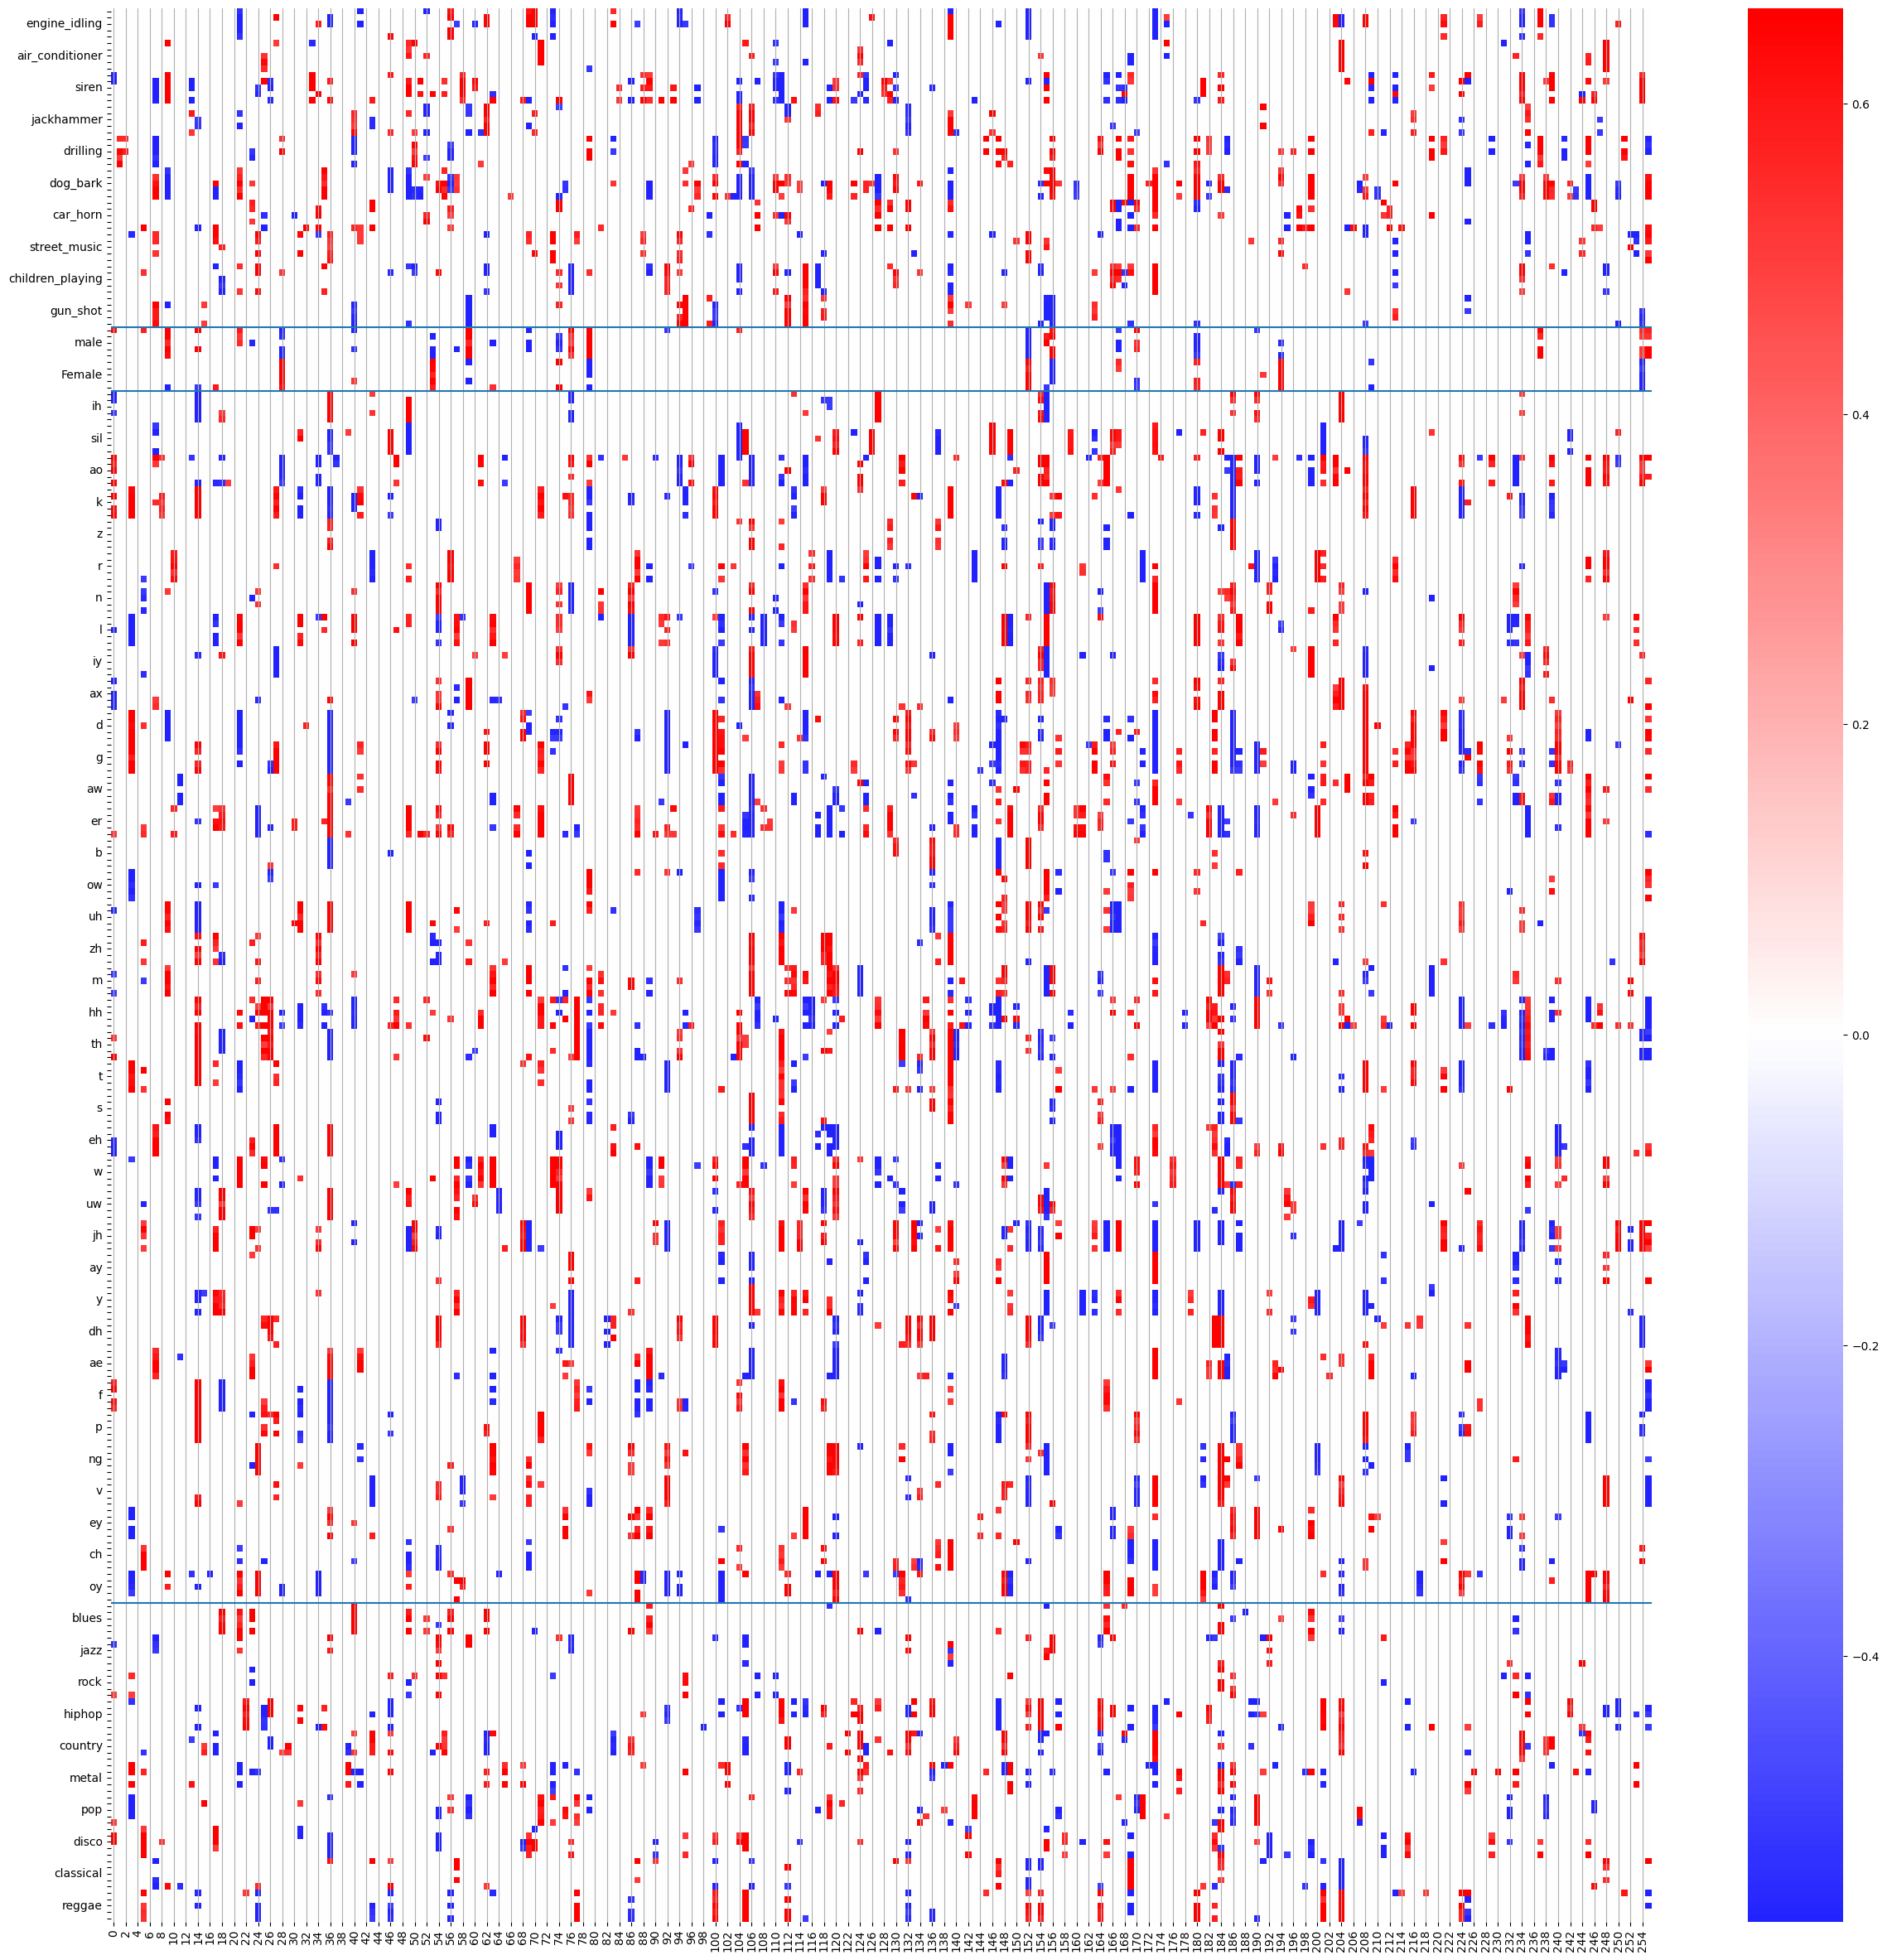

In [12]:
mat = None
class_noise = {v: k for k, v in dataset_noise.map.items()}
class_music = {ii:k for ii,k in enumerate(dataset_style.get_classes())}
class_gender = {0:"male",1:"Female"}
class_phone = {ii:k for ii,k in enumerate(dataset_phone.list_phone)}

ylabels = []
for ii,k in enumerate(sample_noise):
    ylabels.append("")
    ylabels.append("")
    ylabels.append(class_noise[k])
    ylabels.append("")
    ylabels.append("")
    stack = torch.vstack(sample_noise[k])
    if stack.max()>10:
        print(k,stack.shape,ii)
#     assert stack.max()<=1, f"Noise : R_kc >1 {stack.max()}"
    if mat is None:
        mat = stack
    else:
        mat = torch.vstack((mat,stack))
print(mat.shape)

len_1 = mat.shape[0]
for ii,k in enumerate(sample_gender):
    ylabels.append("")
    ylabels.append("")
    ylabels.append(class_gender[k])
    ylabels.append("")
    ylabels.append("")
    stack = torch.vstack(sample_gender[k])
    if stack.max()>10:
        print(k,stack.shape,ii)
#     assert stack.max()<=1, f"Gender : R_kc >1 {stack.max()}"
    if mat is None:
        mat = stack
    else:
        mat = torch.vstack((mat,stack))
print(mat.shape)
len_2 = mat.shape[0]
for ii,k in enumerate(sample_phone):
    ylabels.append("")
    ylabels.append("")
    ylabels.append(class_phone[k])
    ylabels.append("")
    ylabels.append("")
    stack = torch.vstack(sample_phone[k])
    if stack.max()>10:
        print(k,stack.shape,ii)
#     assert stack.max()<=1, f"Phone : R_kc >1 {stack.max()}"
    if mat is None:
        mat = stack
    else:
        mat = torch.vstack((mat,stack))
print(mat.shape)
len_3 = mat.shape[0]
for ii,k in enumerate(sample_music):
    ylabels.append("")
    ylabels.append("")
    ylabels.append(class_music[k])
    ylabels.append("")
    ylabels.append("")
    stack = torch.vstack(sample_music[k])
    if stack.max()>10:
        print(k,stack.shape,ii)
#     assert stack.max()<=1, f"Phone : R_kc >1 {stack.max()}"
    if mat is None:
        mat = stack
    else:
        mat = torch.vstack((mat,stack))
print(mat.shape)
#  = ["","",class_noise[]]
plt.figure(figsize=(30,30))
# print(mat.min(),mat.max())
# print((mat==torch.max(mat)).nonzero())
# print(mat[72,:])
sn.heatmap(mat,robust=True,cmap='bwr',center = 0,yticklabels=ylabels)
plt.grid(True,axis="x")

plt.axhline(len_1)
plt.axhline(len_2)
plt.axhline(len_3)
plt.savefig("activation_map.pdf")

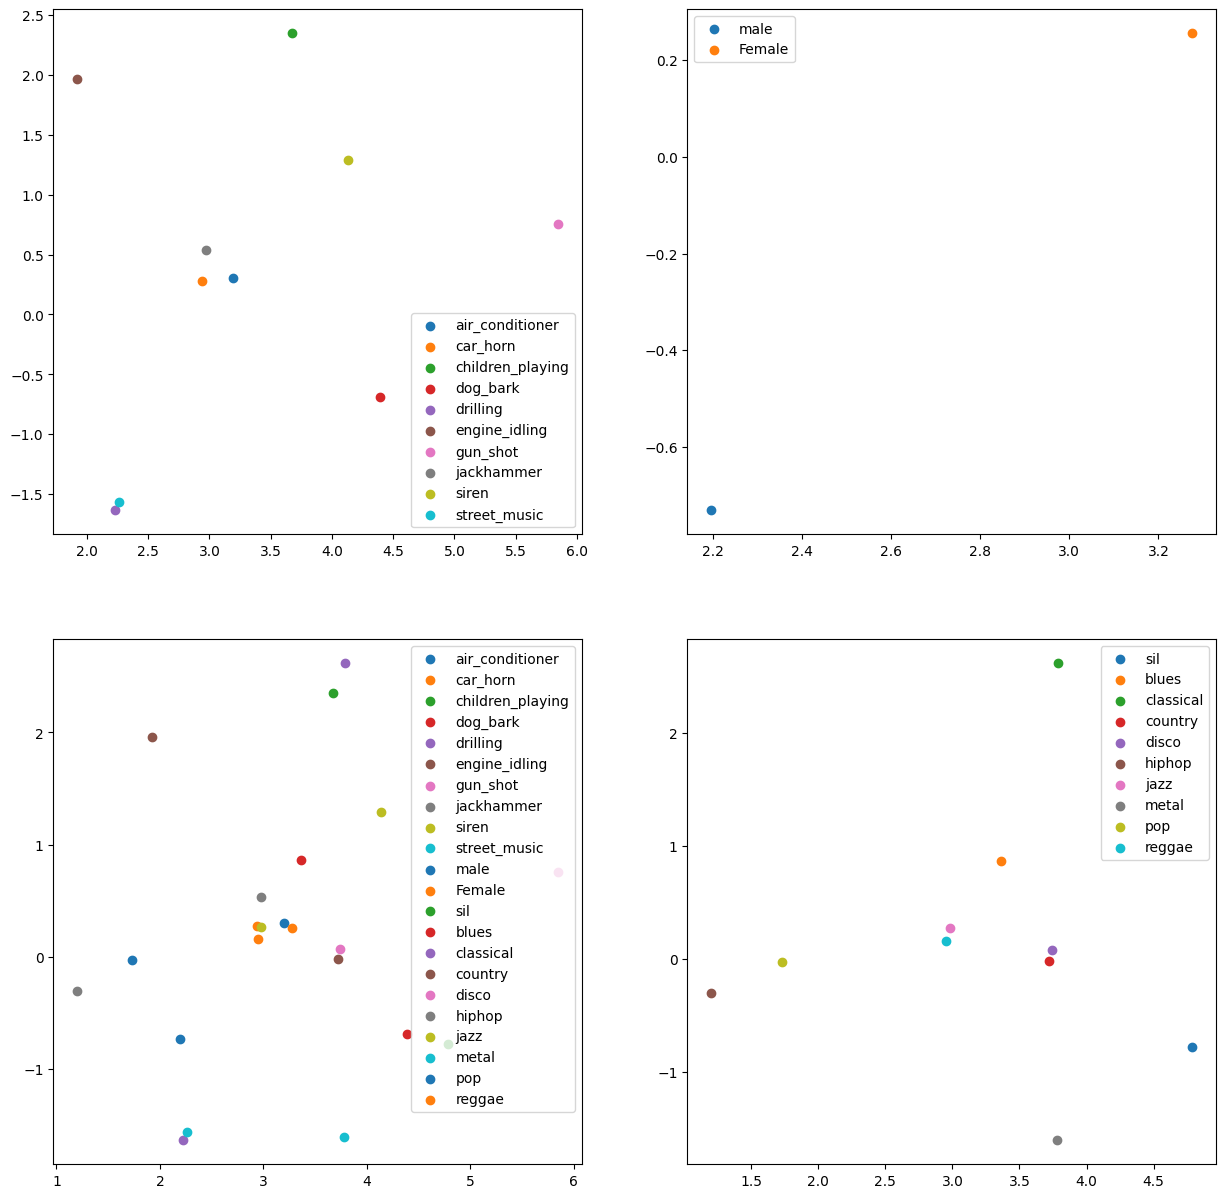

In [54]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = TSNE(n_components = 2)
# pca.fit(mat_normalized_occ)
X = pca.fit_transform(mat_normalized_occ)
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(15,15))
for ii,(x,y) in enumerate(X[:,:]):
    if ii<10:
        ax1.scatter(x,y,label = classes_labels[ii])
    elif ii<12:
        ax2.scatter(x,y,label = classes_labels[ii])
    elif ii<50:
        continue
        ax3.scatter(x,y,label = classes_labels[ii])
    else:
        ax4.scatter(x,y,label = classes_labels[ii])
        
    ax3.scatter(x,y,label = classes_labels[ii])

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
# pca.explained_variance_ratio_

In [13]:
# Load mat
mat = torch.load('activation_matrix')
print(mat.shape)
class_noise = {k: v for k, v in enumerate(['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music'])}
class_music = {ii:k for ii,k in enumerate(['blues','jazz','rock','hiphop','country','metal','pop','disco','classical','reggae'])}
class_gender = {0:"male",1:"Female"}
class_phone = {ii:k for ii,k in enumerate(['iy','ih','eh','ae','ax','uw','uh','ao','ey','ay','oy','aw','ow','er','l','r','w','y','m','n','ng','v','f','dh','th','z','s','zh','jh','ch','b','p','d','dz','t','g','k','hh'])}

torch.Size([299, 256])


# Generation de la matrice

$\mathcal{M} \text{ Moyenne par classe } \in \mathbb{R}^{61 \times 256}$

$Norm = \sum_{i=0}^{C}{\mathcal{M}[i,:]} + eps, \in \mathbb{R}^{256}$

$\mathcal{N} = \mathcal{M} * (1/Norm)$


M torch.Size([60, 256])
Norm torch.Size([256])
N torch.Size([60, 256])


<Axes: >

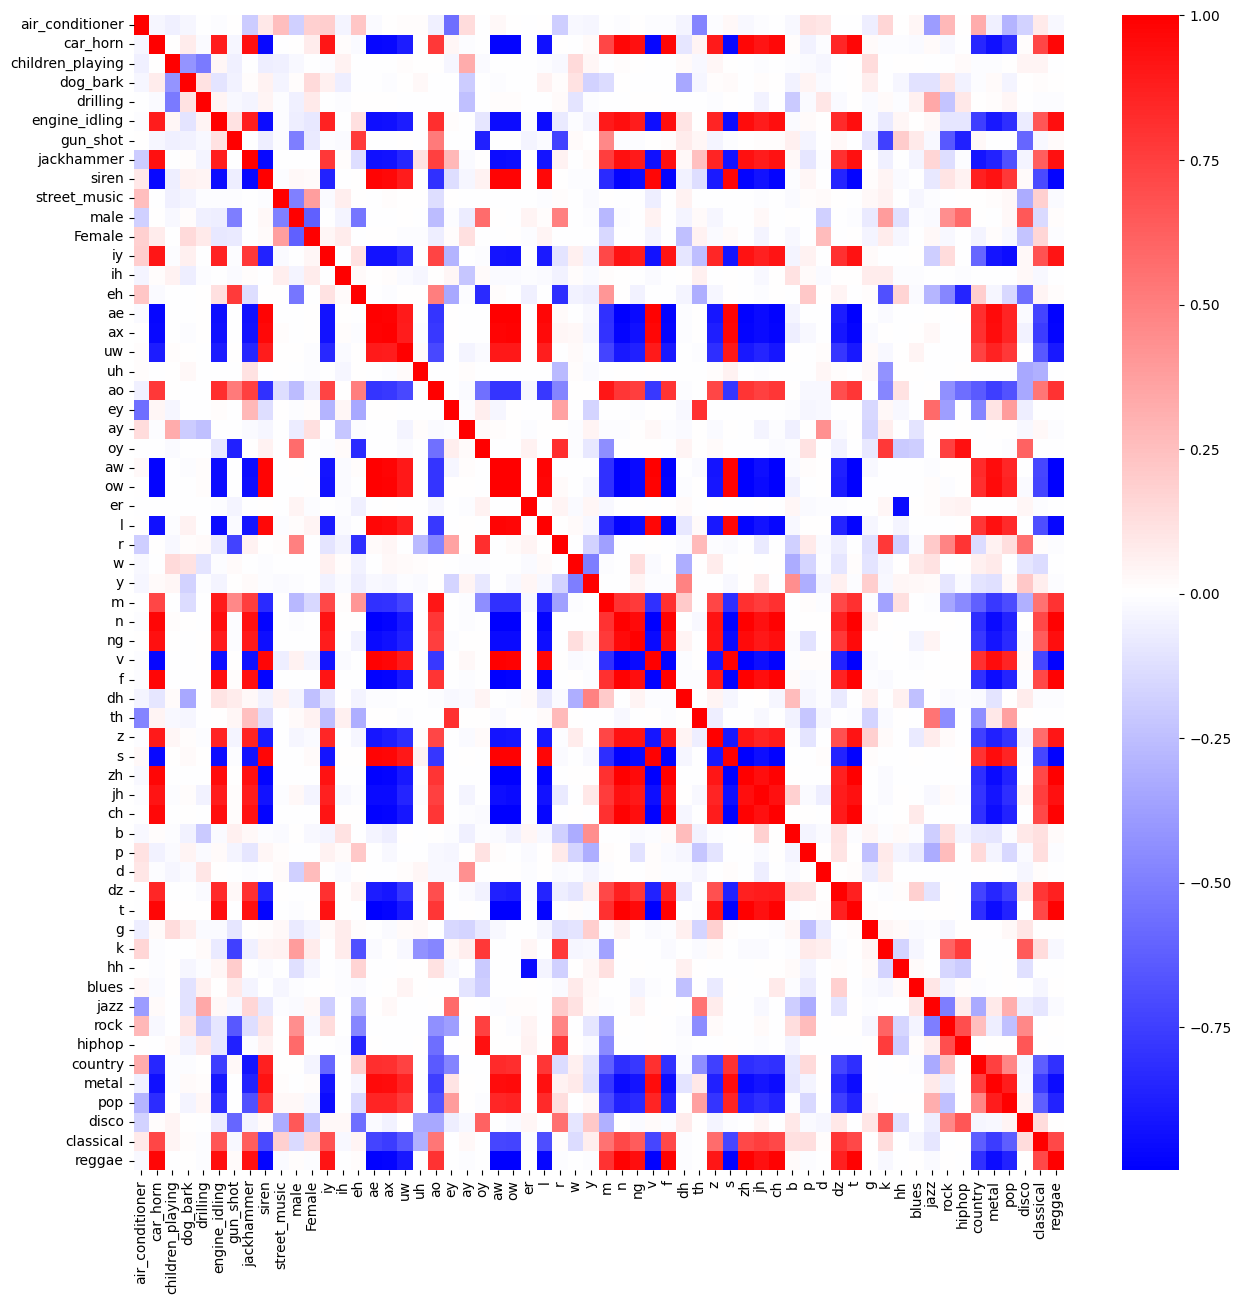

In [38]:
M_acc = []
for ii in range(0,mat.shape[0],5):
    vect = mat[ii:ii+5,:].mean(axis=0)
    M_acc.append(vect)
M = torch.vstack(M_acc)
print("M",M.shape)
# plt.figure(figsize=(15,12))
# sn.heatmap(M,cmap='bwr',center = 0,)
Norm = M.sum(axis=0)+1e-7
print("Norm",Norm.shape)
# self.print(Norm)
N = M * (1/Norm)
print("N",N.shape)

classes_labels = [class_noise[i] for i in range(10)] + [class_gender[i] for i in range(2)] + [class_phone[i] for i in range(38)] + [class_music[i] for i in range(10)]
mat_cosine = np.zeros((60,60))
plt.figure(figsize=(15,15))
for ii,v1 in enumerate(N):
    for jj,v2 in enumerate(N):
        # print(v1.shape,v2.shape)
#         print(v1,v2)
        mat_cosine[ii,jj] = F.cosine_similarity(v1,v2,dim=0)
#         print(f"[{classes_labels[ii]} vs {classes_labels[jj]}] : {F.cosine_similarity(v1,v2,dim=0)}")
sn.heatmap(mat_cosine,xticklabels=classes_labels,cmap='bwr',center = 0,yticklabels=classes_labels)

COSINE Index
[noise_probe vs noise_probe] : 1.0
[noise_probe vs phone_probe] : 0.802518367767334
[noise_probe vs gender_probe] : 0.7546002268791199
[phone_probe vs noise_probe] : 0.802518367767334
[phone_probe vs phone_probe] : 1.0
[phone_probe vs gender_probe] : 0.7416936159133911
[gender_probe vs noise_probe] : 0.7546002268791199
[gender_probe vs phone_probe] : 0.7416936159133911
[gender_probe vs gender_probe] : 1.0


Text(0.5, 1.0, 'Similarity between components rank of activation')

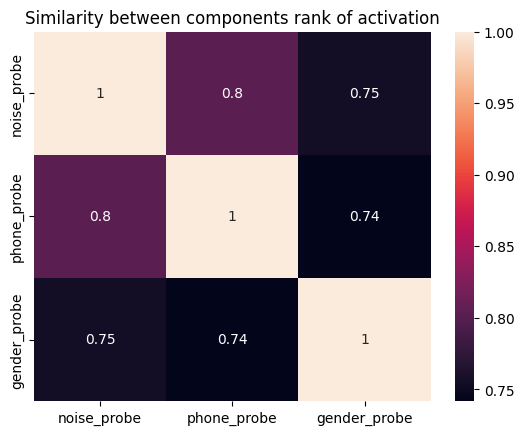

In [15]:
print("COSINE Index")
mat = np.zeros((3,3))
def l1(vect):
    return vect.abs().sum(dim=0)
def l2(vect):
    return vect.pow(2).sum(dim=0).sqrt()
for ii,(ckpti,labeli) in enumerate([(noise_results,"noise_probe"),(phone_results,"phone_probe"),(gender_results,"gender_probe")]):
    for jj,(ckptj,labelj) in enumerate([(noise_results,"noise_probe"),(phone_results,"phone_probe"),(gender_results,"gender_probe"),]):
        composantes_i = torch.argsort(ckpti).float()
        composantes_j = torch.argsort(ckptj).float()
        mat[ii,jj] = F.cosine_similarity(composantes_i,composantes_j,dim=0)
        print(f"[{labeli} vs {labelj}] : {F.cosine_similarity(composantes_i,composantes_j,dim=0)}")
sn.heatmap(mat,annot=True,xticklabels=['noise_probe','phone_probe','gender_probe'],yticklabels=['noise_probe','phone_probe','gender_probe'])
plt.title("Similarity between components rank of activation")

COSINE Index
[noise_probe vs noise_probe] : 1.0
[noise_probe vs phone_probe] : 0.7467201352119446
[noise_probe vs gender_probe] : 0.7393130660057068
[noise_probe vs style_probe] : 0.749472439289093
[noise_probe vs stylemean_probe] : 0.7554875612258911
[phone_probe vs noise_probe] : 0.7467201352119446
[phone_probe vs phone_probe] : 1.0
[phone_probe vs gender_probe] : 0.7178654074668884
[phone_probe vs style_probe] : 0.7515965104103088
[phone_probe vs stylemean_probe] : 0.7668222188949585
[gender_probe vs noise_probe] : 0.7393130660057068
[gender_probe vs phone_probe] : 0.7178654074668884
[gender_probe vs gender_probe] : 1.0
[gender_probe vs style_probe] : 0.7633995413780212
[gender_probe vs stylemean_probe] : 0.761324942111969
[style_probe vs noise_probe] : 0.749472439289093
[style_probe vs phone_probe] : 0.7515965104103088
[style_probe vs gender_probe] : 0.7633995413780212
[style_probe vs style_probe] : 1.0
[style_probe vs stylemean_probe] : 0.7494229674339294
[stylemean_probe vs noise

Text(0.5, 1.0, 'Similarity between components rank of activation')

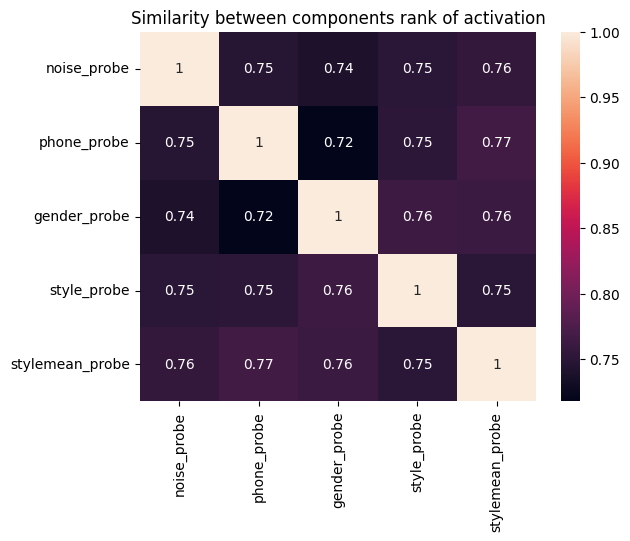

In [49]:
print("COSINE Index")
mat = np.zeros((5,5))
def l1(vect):
    return vect.abs().sum(dim=0)
def l2(vect):
    return vect.pow(2).sum(dim=0).sqrt()
for ii,(ckpti,labeli) in enumerate([(noise_results,"noise_probe"),(phone_results,"phone_probe"),(gender_results,"gender_probe"),(style_results,"style_probe"),(stylemean_results,"stylemean_probe")]):
    for jj,(ckptj,labelj) in enumerate([(noise_results,"noise_probe"),(phone_results,"phone_probe"),(gender_results,"gender_probe"),(style_results,"style_probe"),(stylemean_results,"stylemean_probe")]):
        composantes_i = torch.argsort(ckpti[:256]).float()
        composantes_j = torch.argsort(ckptj[:256]).float()
        mat[ii,jj] = F.cosine_similarity(composantes_i,composantes_j,dim=0)
        print(f"[{labeli} vs {labelj}] : {F.cosine_similarity(composantes_i,composantes_j,dim=0)}")
sn.heatmap(mat,annot=True,xticklabels=['noise_probe','phone_probe','gender_probe',"style_probe","stylemean_probe"],yticklabels=['noise_probe','phone_probe','gender_probe',"style_probe","stylemean_probe"])
plt.title("Similarity between components rank of activation")

COSINE Index
[noise_probe vs noise_probe] : 1.0
[noise_probe vs phone_probe] : 0.731645941734314
[noise_probe vs gender_probe] : 0.03672477602958679
[phone_probe vs noise_probe] : 0.731645941734314
[phone_probe vs phone_probe] : 1.0
[phone_probe vs gender_probe] : 0.06932015717029572
[gender_probe vs noise_probe] : 0.03672477602958679
[gender_probe vs phone_probe] : 0.06932015717029572
[gender_probe vs gender_probe] : 1.0


Text(0.5, 1.0, 'Similarity between components activation')

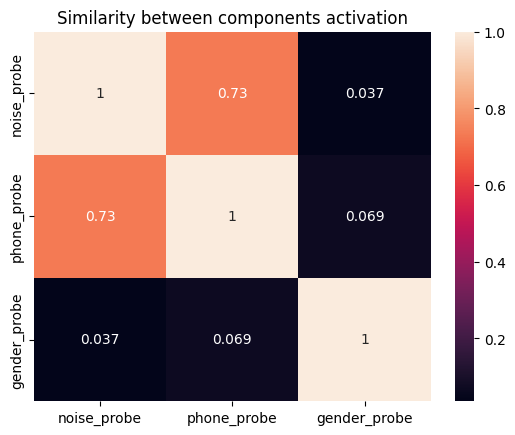

In [16]:
print("COSINE Index")
mat = np.zeros((3,3))
def l1(vect):
    return vect.abs().sum(dim=0)
def l2(vect):
    return vect.pow(2).sum(dim=0).sqrt()
for ii,(ckpti,labeli) in enumerate([(noise_results,"noise_probe"),(phone_results,"phone_probe"),(gender_results,"gender_probe")]):
    for jj,(ckptj,labelj) in enumerate([(noise_results,"noise_probe"),(phone_results,"phone_probe"),(gender_results,"gender_probe")]):
        composantes_i = ckpti
        composantes_j = ckptj
        mat[ii,jj] = F.cosine_similarity(composantes_i,composantes_j,dim=0)
        print(f"[{labeli} vs {labelj}] : {F.cosine_similarity(composantes_i,composantes_j,dim=0)}")
sn.heatmap(mat,annot=True,xticklabels=['noise_probe','phone_probe','gender_probe'],yticklabels=['noise_probe','phone_probe','gender_probe'])
plt.title("Similarity between components activation")

COSINE Index
[noise_probe vs noise_probe] : 1.0
[noise_probe vs phone_probe] : -0.036388445645570755
[noise_probe vs gender_probe] : -0.12789146602153778
[noise_probe vs style_probe] : 0.2845343053340912
[noise_probe vs stylemean_probe] : 0.13667842745780945
[phone_probe vs noise_probe] : -0.036388445645570755
[phone_probe vs phone_probe] : 1.0
[phone_probe vs gender_probe] : -0.1665480136871338
[phone_probe vs style_probe] : 0.005238488782197237
[phone_probe vs stylemean_probe] : 0.12664560973644257
[gender_probe vs noise_probe] : -0.12789146602153778
[gender_probe vs phone_probe] : -0.1665480136871338
[gender_probe vs gender_probe] : 1.0
[gender_probe vs style_probe] : -0.14440730214118958
[gender_probe vs stylemean_probe] : -0.15019434690475464
[style_probe vs noise_probe] : 0.2845343053340912
[style_probe vs phone_probe] : 0.005238488782197237
[style_probe vs gender_probe] : -0.14440730214118958
[style_probe vs style_probe] : 1.0
[style_probe vs stylemean_probe] : 0.161116793751716

Text(0.5, 1.0, 'Similarity between components activation')

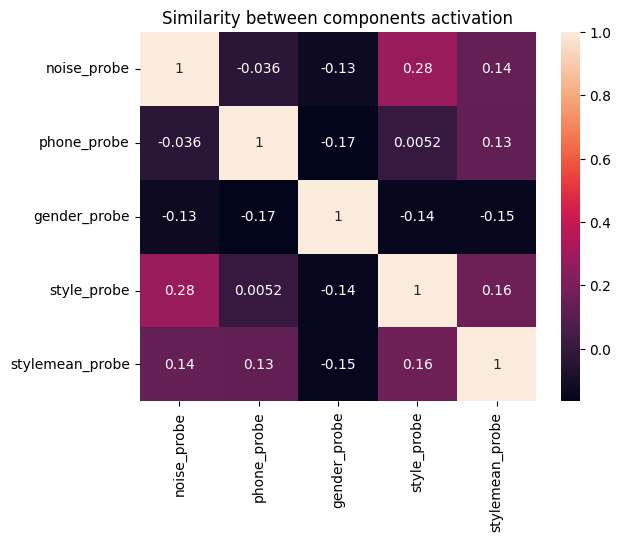

In [47]:
print("COSINE Index")
mat = np.zeros((5,5))
def l1(vect):
    return vect.abs().sum(dim=0)
def l2(vect):
    return vect.pow(2).sum(dim=0).sqrt()
for ii,(ckpti,labeli) in enumerate([(noise_results,"noise_probe"),(phone_results,"phone_probe"),(gender_results,"gender_probe"),(style_results,"style_probe"),(stylemean_results,"stylemean_probe")]):
    for jj,(ckptj,labelj) in enumerate([(noise_results,"noise_probe"),(phone_results,"phone_probe"),(gender_results,"gender_probe"),(style_results,"style_probe"),(stylemean_results,"stylemean_probe")]):
        composantes_i = ckpti[:256]
        composantes_j = ckptj[:256]
        mat[ii,jj] = F.cosine_similarity(composantes_i,composantes_j,dim=0)
        print(f"[{labeli} vs {labelj}] : {F.cosine_similarity(composantes_i,composantes_j,dim=0)}")
sn.heatmap(mat,annot=True,xticklabels=['noise_probe','phone_probe','gender_probe',"style_probe","stylemean_probe"],yticklabels=['noise_probe','phone_probe','gender_probe',"style_probe","stylemean_probe"])
plt.title("Similarity between components activation")

In [20]:
import numpy
import pandas

def get_audio_example_from_csv(csv_file,
                               audio_path,
                               num_seg=20,
                               label="sp",
                               seed=1234,):
    fs=16e3
    full_df = pandas.read_csv(csv_file, names=["show","start","duration","cluster"],sep=", ")
    #filter according to the target label
    full_df = full_df[full_df["cluster"] == label]
    full_df = full_df.sample(n=num_seg,random_state=numpy.random.default_rng(seed=seed))
    
    all_audio=[]
    for i,seg in full_df.iterrows():
        audio,_ = torchaudio.load(f"{audio_path}{seg['show']}.wav",frame_offset=int(seg["start"]*fs),num_frames=int(seg["duration"]*fs))
        all_audio.append(audio)
    return all_audio

In [21]:
data_path="/lium/raid01_b/mlebour/data/Albayzin_10_16_pyannote/"
dataset="AragonRadio"
train_list=f"{data_path}lists/{dataset}/train.txt"
dev_list=f"{data_path}lists/{dataset}/dev1.txt"
audio_path=f"{data_path}audio/{dataset}/"
rttm_path=f"{data_path}rttms_segmentation/{dataset}/"
csv_file="./out.csv"

speech_audio = get_audio_example_from_csv(csv_file=csv_file,
                                        audio_path=audio_path,
                                        num_seg=100,
                                        label="sp",
                                        seed=1,)

music_audio = get_audio_example_from_csv(csv_file=csv_file,
                                        audio_path=audio_path,
                                        num_seg=100,
                                        label="mu",
                                        seed=1,)

# noise_audio = get_audio_example_from_csv(csv_file=csv_file,
#                                         audio_path=audio_path,
#                                         num_seg=100,
#                                         label="no",
#                                         seed=1,)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
ov_audio = get_audio_example_from_csv(csv_file=csv_file,
                                        audio_path=audio_path,
                                        num_seg=200,
                                        label="sp",
                                        seed=10,)

In [8]:
classes= ["sp","no","mu","ov"]
weights = model.class_layer.state_dict()['weight']


In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

MASNMF(
  (spec_feat): SpecFeat(
    (spec): Spectrogram()
  )
  (wavlm): WavLM_Feats(
    (feature_extract): UpstreamExpert(
      (model): WavLM(
        (feature_extractor): ConvFeatureExtractionModel(
          (conv_layers): ModuleList(
            (0): Sequential(
              (0): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
              (1): Dropout(p=0.0, inplace=False)
              (2): Sequential(
                (0): TransposeLast()
                (1): Fp32LayerNorm((512,), eps=1e-05, elementwise_affine=True)
                (2): TransposeLast()
              )
              (3): GELU()
            )
            (1): Sequential(
              (0): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
              (1): Dropout(p=0.0, inplace=False)
              (2): Sequential(
                (0): TransposeLast()
                (1): Fp32LayerNorm((512,), eps=1e-05, elementwise_affine=True)
                (2): TransposeLast()
              )
     

In [16]:
### music_general
mainmusic_results = None
label = 2
nb_mean = 0

for data in tqdm.tqdm(music_audio):

    with torch.no_grad():
        feat = model.wavlm(data.to(device))
        H = model.emb_transform(feat)
    
    r_kc, mask, idx_relevant = get_relevant_components(H=H,
                                classif_weights=weights,
                                thres=0.0,
                                reduction="mean",
                                class_index=label,
                                lims=(-1,1),
                                doplot=False)
    if mainmusic_results is None:
        mainmusic_results = r_kc
    else:
        mainmusic_results += r_kc
    nb_mean+=1
    

100%|██████████| 100/100 [00:03<00:00, 26.43it/s]


In [17]:
mainmusic_results/=nb_mean

In [19]:
### speech_general
mainspeech_results = None
label = 0
nb_mean = 0

for data in tqdm.tqdm(speech_audio):

    with torch.no_grad():
        feat = model.wavlm(data.to(device))
        H = model.emb_transform(feat)
    
    r_kc, mask, idx_relevant = get_relevant_components(H=H,
                                classif_weights=weights,
                                thres=0.0,
                                reduction="mean",
                                class_index=0,
                                lims=(-1,1),
                                doplot=False)
    if mainspeech_results is None:
        mainspeech_results = r_kc
    else:
        mainspeech_results += r_kc
    nb_mean+=1
mainspeech_results /= nb_mean

100%|██████████| 100/100 [00:03<00:00, 26.58it/s]


In [20]:
### ov_general

mainov_results = None
label = 3
nb_mean = 0
spk_1 = ov_audio[:200//2]
spk_2 = ov_audio[200//2:]
art_ov = []
for s1, s2 in zip(spk_1,spk_2):
    art_ov.append(.5*(s1+s2))

for data in tqdm.tqdm(art_ov):

    with torch.no_grad():
        feat = model.wavlm(data.to(device))
        H = model.emb_transform(feat)
    
    r_kc, mask, idx_relevant = get_relevant_components(H=H,
                                classif_weights=weights,
                                thres=0.0,
                                reduction="mean",
                                class_index=label,
                                lims=(-1,1),
                                doplot=False)
    if mainov_results is None:
        mainov_results = r_kc
    else:
        mainov_results += r_kc
    nb_mean+=1
mainov_results/=nb_mean

100%|██████████| 100/100 [00:03<00:00, 26.42it/s]


In [21]:
print("COSINE")
mat = np.zeros((8,8))
def l1(vect):
    return vect.abs().sum(dim=0)
def l2(vect):
    return vect.pow(2).sum(dim=0).sqrt()

for ii,(ckpti,labeli) in enumerate([(noise_results,"noise_probe"),(phone_results,"phone_probe"),(gender_results,"gender_probe"),(style_results,"style_probe"),(stylemean_results,"stylemean_probe"),(mainmusic_results,"mainmusic_seg"),(mainspeech_results,"mainspeech_seg"),(mainov_results,"mainov_seg")]):
    for jj,(ckptj,labelj) in enumerate([(noise_results,"noise_probe"),(phone_results,"phone_probe"),(gender_results,"gender_probe"),(style_results,"style_probe"),(stylemean_results,"stylemean_probe"),(mainmusic_results,"mainmusic_seg"),(mainspeech_results,"mainspeech_seg"),(mainov_results,"mainov_seg")]):
        if labeli==labelj:
            continue
        composantes_i = ckpti[:256]
        composantes_j = ckptj[:256]
        mat[ii,jj] = F.cosine_similarity(composantes_i,composantes_j,dim=0)
        print(f"[{labeli} vs {labelj}] : {F.cosine_similarity(composantes_i,composantes_j,dim=0)}")
plt.figure(figsize=(10,10))
sn.heatmap(mat,annot=True,cmap='bwr',center=0,xticklabels=['noise_probe','phone_probe','gender_probe',"style_probe","stylemean_probe",'mainmusic_seg','mainspeech_seg','mainov_seg'],yticklabels=['noise_probe','phone_probe','gender_probe',"style_probe","stylemean_probe",'mainmusic_seg','mainspeech_seg','mainov_seg'])
plt.title("Similarity between components activation")

COSINE


NameError: name 'noise_results' is not defined

norm l2
[noise_probe vs phone_probe] : 0.6630438566207886
[noise_probe vs gender_probe] : 1.0004616975784302
[noise_probe vs style_probe] : 0.5898681879043579
[noise_probe vs stylemean_probe] : 0.880668580532074
[noise_probe vs mainmusic_seg] : 2.446176528930664
[noise_probe vs mainspeech_seg] : 2.1865174770355225
[noise_probe vs mainov_seg] : 2.248610734939575
[phone_probe vs noise_probe] : 0.6630239486694336
[phone_probe vs gender_probe] : 0.8470458388328552
[phone_probe vs style_probe] : 0.44745007157325745
[phone_probe vs stylemean_probe] : 0.7690135836601257
[phone_probe vs mainmusic_seg] : 2.6471447944641113
[phone_probe vs mainspeech_seg] : 2.194592237472534
[phone_probe vs mainov_seg] : 2.2690112590789795
[gender_probe vs noise_probe] : 1.0004485845565796
[gender_probe vs phone_probe] : 0.8470460772514343
[gender_probe vs style_probe] : 0.8580635786056519
[gender_probe vs stylemean_probe] : 1.122295618057251
[gender_probe vs mainmusic_seg] : 2.810037851333618
[gender_probe vs m

Text(0.5, 1.0, 'L2-Norm between components activation')

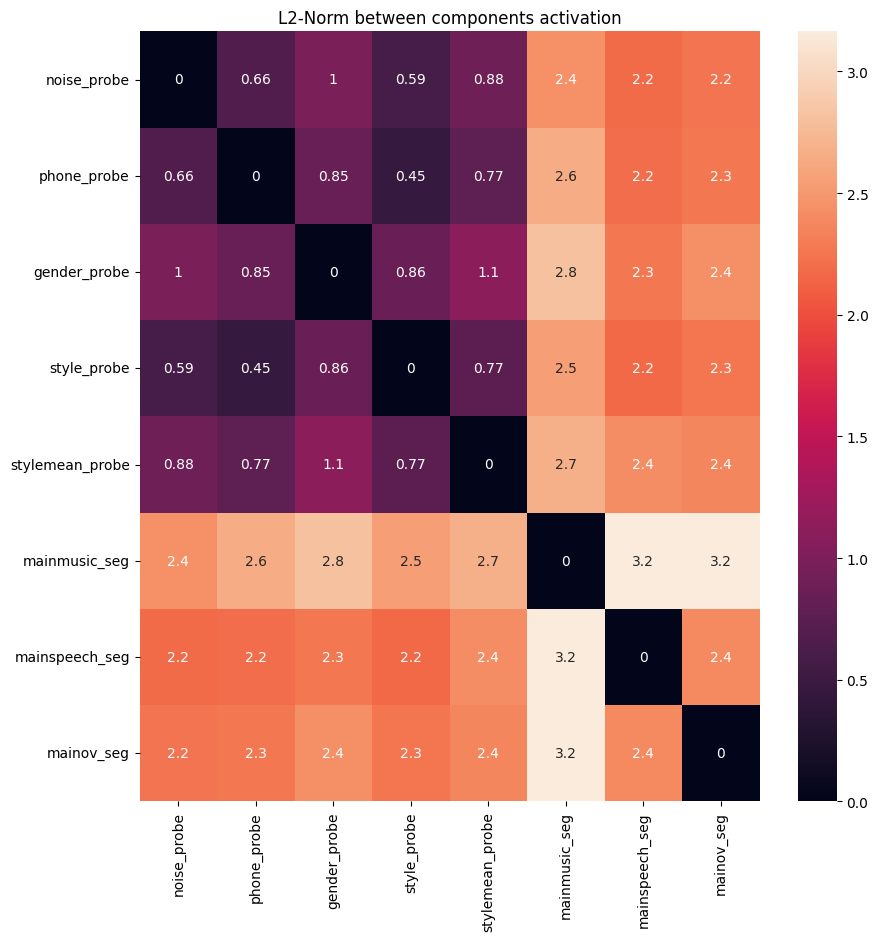

In [28]:
print("norm l2")
mat = np.zeros((8,8))
for ii,(ckpti,labeli) in enumerate([(noise_results,"noise_probe"),(phone_results,"phone_probe"),(gender_results,"gender_probe"),(style_results,"style_probe"),(stylemean_results,"stylemean_probe"),(mainmusic_results,"mainmusic_seg"),(mainspeech_results,"mainspeech_seg"),(mainov_results,"mainov_seg")]):
    for jj,(ckptj,labelj) in enumerate([(noise_results,"noise_probe"),(phone_results,"phone_probe"),(gender_results,"gender_probe"),(style_results,"style_probe"),(stylemean_results,"stylemean_probe"),(mainmusic_results,"mainmusic_seg"),(mainspeech_results,"mainspeech_seg"),(mainov_results,"mainov_seg")]):
        if labeli==labelj:
            continue
        composantes_i = ckpti[:256]
        composantes_j = ckptj[:256]
        mat[ii,jj] = F.pairwise_distance(composantes_i,composantes_j)
        print(f"[{labeli} vs {labelj}] : {F.pairwise_distance(composantes_i,composantes_j)}")
plt.figure(figsize=(10,10))
sn.heatmap(mat,annot=True,xticklabels=['noise_probe','phone_probe','gender_probe',"style_probe","stylemean_probe",'mainmusic_seg','mainspeech_seg','mainov_seg'],yticklabels=['noise_probe','phone_probe','gender_probe',"style_probe","stylemean_probe",'mainmusic_seg','mainspeech_seg','mainov_seg'])
plt.title("L2-Norm between components activation")